# Analisis Exploratorio de Datos

In [2]:
# importamos librerias estandar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carga de datos
df = pd.read_csv('data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Estructura

In [4]:
print("Forma:", df.shape)
display(df.head())

Forma: (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,16598.0,NaN,NaN,NaN,8300.605254,4791.853933,1.0,4151.25,8300.5,12449.75,16600.0
Name,16598,11493,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16598,31,DS,2163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,16327.0,NaN,NaN,NaN,2006.406443,5.828981,1980.0,2003.0,2007.0,2010.0,2020.0
Genre,16598,12,Action,3316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16540,578,Electronic Arts,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16598.0,NaN,NaN,NaN,0.264667,0.816683,0.0,0.0,0.08,0.24,41.49
EU_Sales,16598.0,NaN,NaN,NaN,0.146652,0.505351,0.0,0.0,0.02,0.11,29.02
JP_Sales,16598.0,NaN,NaN,NaN,0.077782,0.309291,0.0,0.0,0.0,0.04,10.22
Other_Sales,16598.0,NaN,NaN,NaN,0.048063,0.188588,0.0,0.0,0.01,0.04,10.57


# Calidad

In [6]:
na = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean() * 100).sort_values(ascending=False)
display(pd.DataFrame({"nulls": na, "null_pct": na_pct}).query("nulls > 0"))

,nulls,null_pct
Year,271,1.632727
Publisher,58,0.349440


In [7]:
# Duplicados Generales
print("Duplicados (fila completa):", df.duplicated().sum())

Duplicados (fila completa): 0


In [8]:
# Duplicados por clave
key_cols = ["Name", "Platform", "Year"]
if all(c in df.columns for c in key_cols):
    print("Duplicados por (Name,Platform,Year):", df.duplicated(subset=key_cols).sum())

Duplicados por (Name,Platform,Year): 2


In [9]:
# Valores inválidos
if "Year" in df.columns:
    # forzar Year a numérico si viene raro
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    print("Years nulos tras coerción:", df["Year"].isna().sum())
    if df["Year"].notna().any():
        print("Year min/max:", int(df["Year"].min()), int(df["Year"].max()))

Years nulos tras coerción: 271
Year min/max: 1980 2020


# Estadisticas

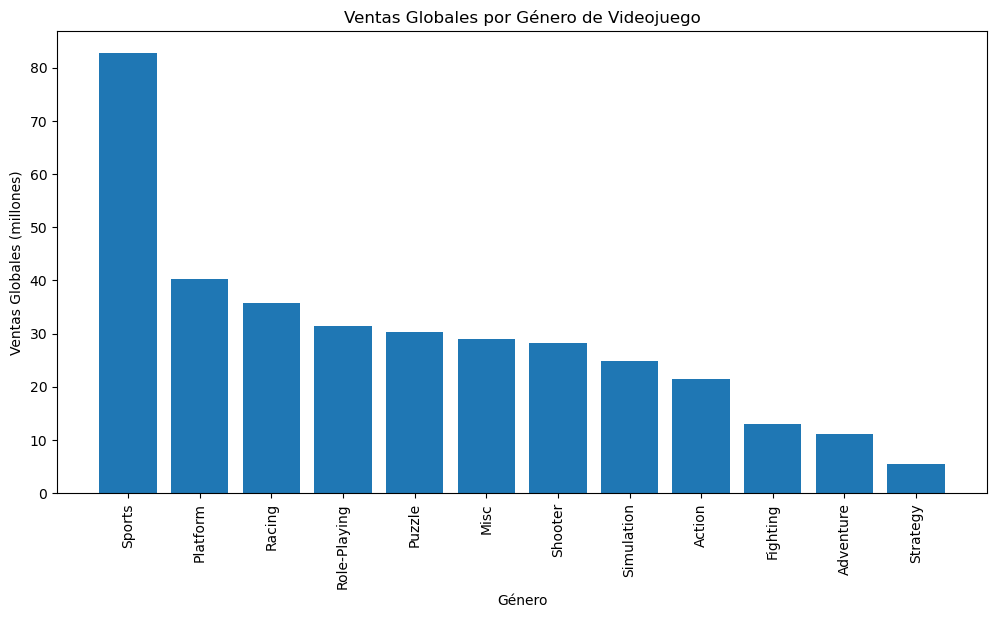

In [19]:
X= df['Genre']
Y= df['Global_Sales']
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(X, Y)
plt.xticks(rotation=90)
plt.title('Ventas Globales por Género de Videojuego')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (millones)')
plt.show()

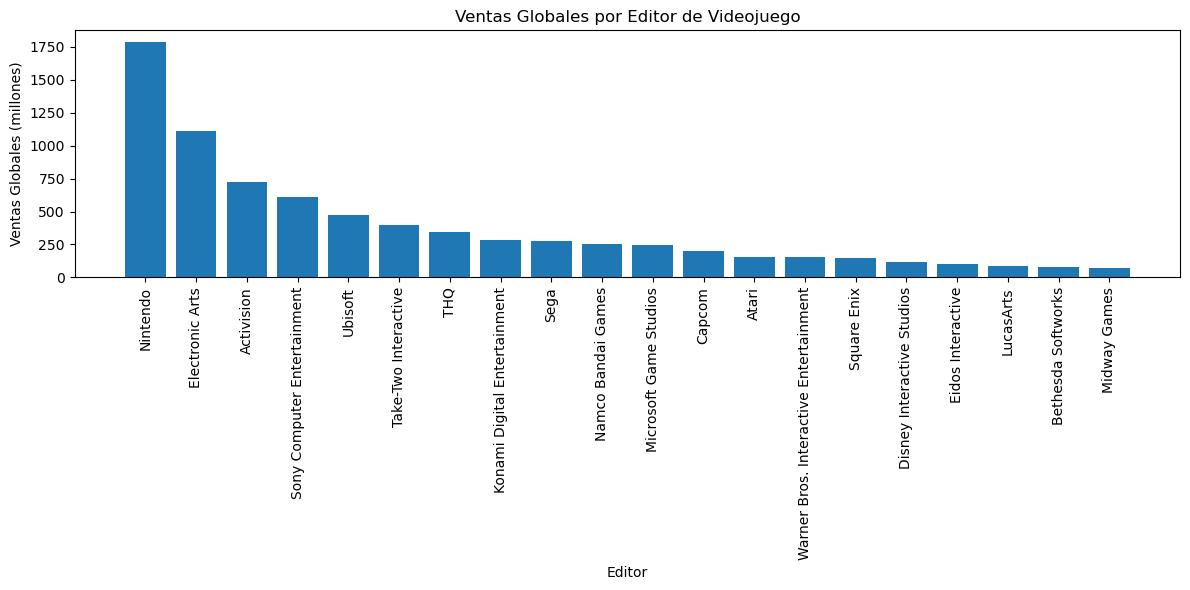

In [24]:
agrupados = (
    df.groupby('Publisher')['Global_Sales']
    .sum()
    #.reset_index()
    .sort_values(ascending=False)
    .head(20)
)
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(agrupados.index, agrupados.values)

plt.xticks(rotation=90)
plt.title('Ventas Globales por Editor de Videojuego')
plt.xlabel('Editor')
plt.ylabel('Ventas Globales (millones)')
plt.tight_layout()
plt.show()

# Distribuciones + OutLiers

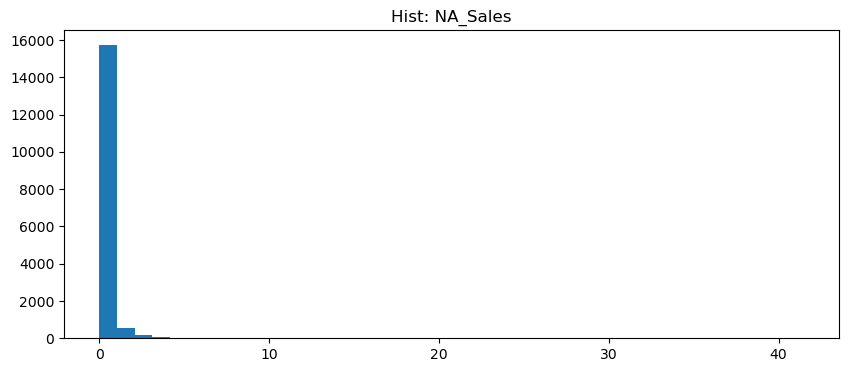

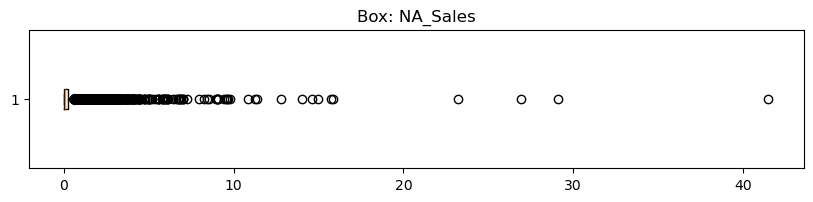

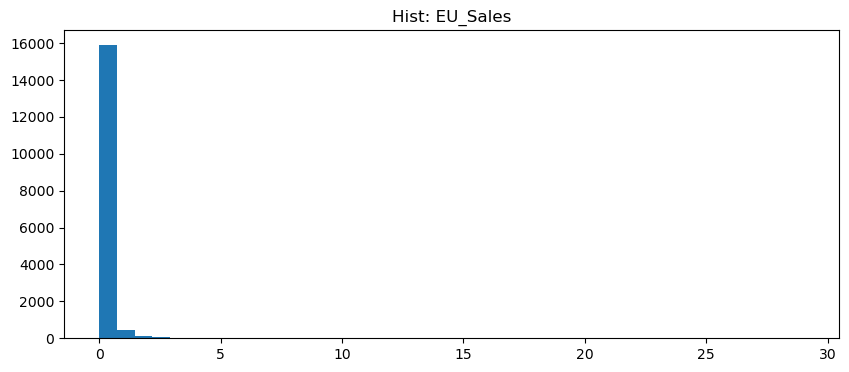

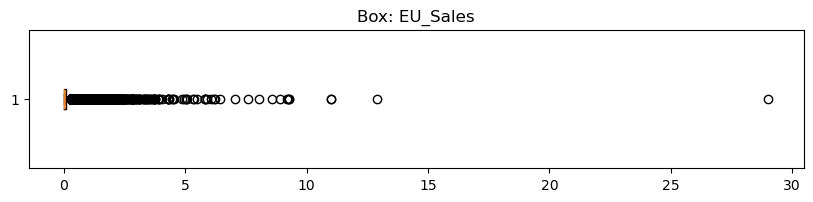

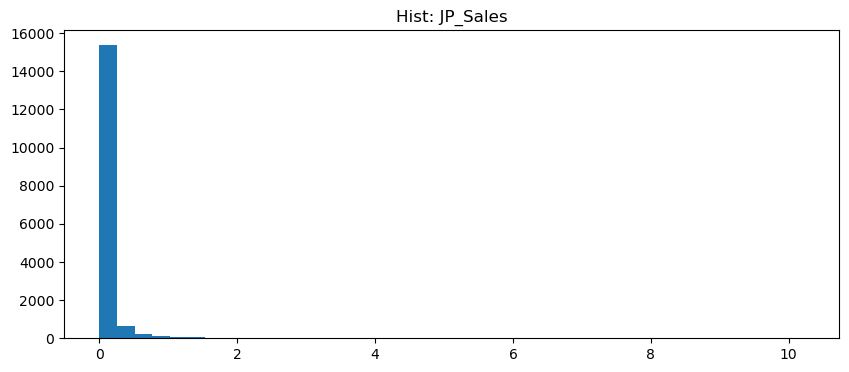

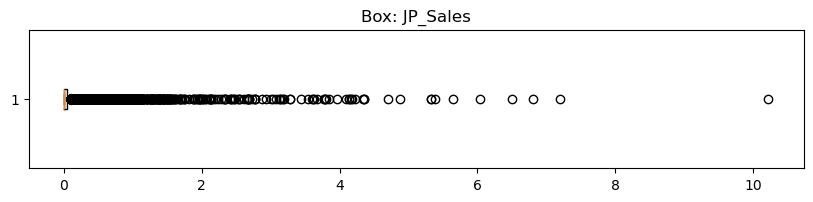

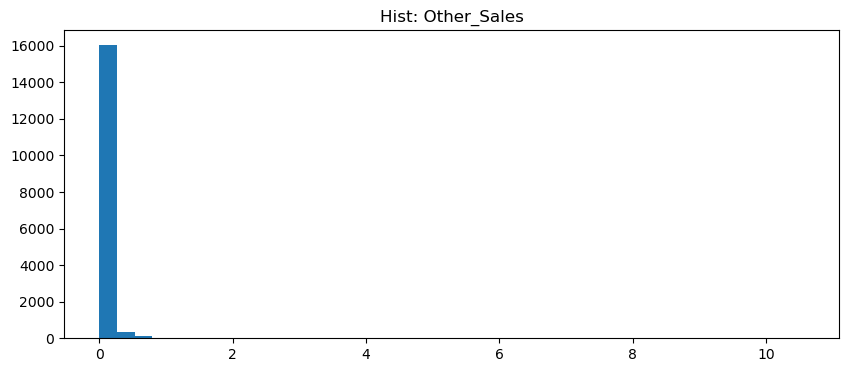

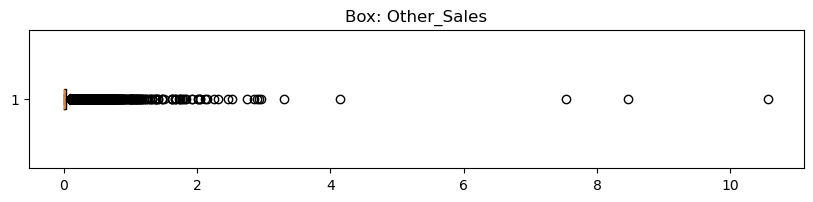

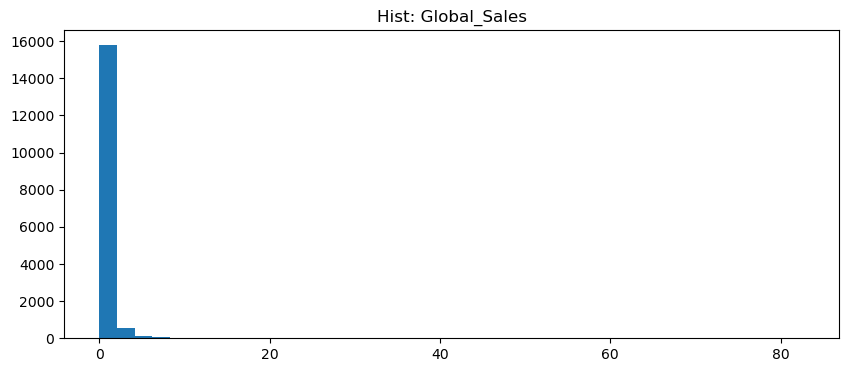

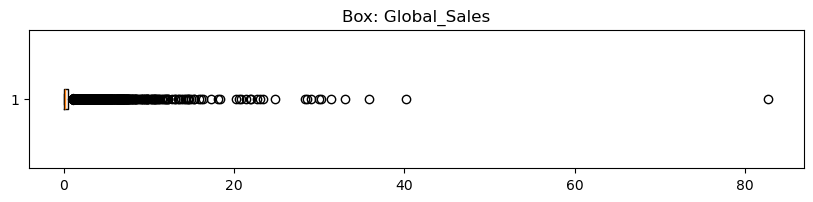

In [25]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def hist_box(series, title):
    s = series.dropna()
    fig = plt.figure(figsize=(10,4))
    plt.hist(s, bins=40)
    plt.title(f"Hist: {title}")
    plt.show()

    fig = plt.figure(figsize=(10,1.8))
    plt.boxplot(s, vert=False)
    plt.title(f"Box: {title}")
    plt.show()

for c in num_cols:
    if c.lower().endswith("sales") or c in ["Global_Sales","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]:
        hist_box(df[c], c)

# Top N

## Genero

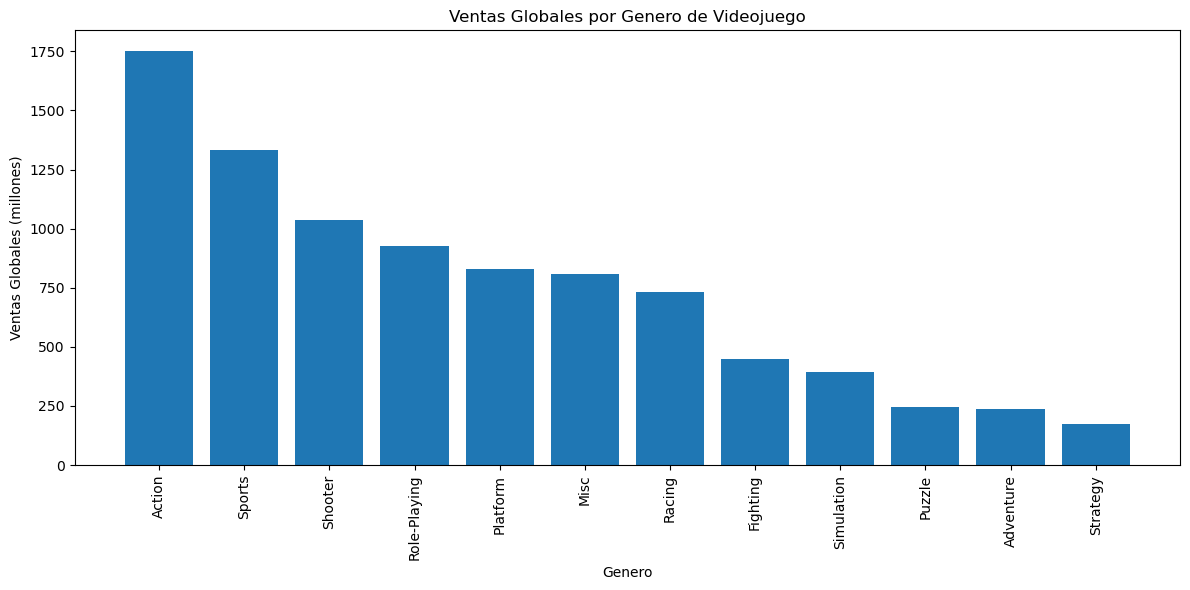

In [27]:
agrupados = (
    df.groupby('Genre')['Global_Sales']
    .sum()
    #.reset_index()
    .sort_values(ascending=False)
    .head(20)
)
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(agrupados.index, agrupados.values)

plt.xticks(rotation=90)
plt.title('Ventas Globales por Genero de Videojuego')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales (millones)')
plt.tight_layout()
plt.show()

In [28]:
top_20_ventas = df.nlargest(20, 'Global_Sales')
display(top_20_ventas[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


In [31]:
# Top 20 por cada editor
top_20_por_editor = (
    df
    .sort_values(['Publisher', 'Global_Sales'], ascending=[True, False])
    .groupby('Publisher')
    .head(20)
    .reset_index(drop=True)
)

display(top_20_por_editor[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Panzer Tactics,DS,2007.0,Strategy,10TACLE Studios,0.06
1,Boulder Dash: Rocks!,DS,2007.0,Puzzle,10TACLE Studios,0.03
2,Pirates: Legend of the Black Buccaneer,PS2,2006.0,Adventure,10TACLE Studios,0.02
3,Men of War: Assault Squad,PC,2011.0,Strategy,1C Company,0.05
4,Off-Road Drive,PC,2011.0,Racing,1C Company,0.04
...,...,...,...,...,...,...
3817,SoniPro,3DS,2014.0,Adventure,imageepoch Inc.,0.01
3818,Wasteland 2,PC,2015.0,Role-Playing,inXile Entertainment,0.10
3819,Monster Strike 3DS,3DS,2015.0,Action,"mixi, Inc",0.86
3820,Yourself Fitness,XB,2004.0,Sports,responDESIGN,0.09


In [33]:
top_20_por_publisher = (
    df
    .groupby('Publisher', group_keys=False)
    .apply(lambda x: x.nlargest(20, 'Global_Sales'), include_groups=False)
    .reset_index(drop=True)
)

top_20_por_publisher


,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12351,Panzer Tactics,DS,2007.0,Strategy,0.06,0.00,0.00,0.00,0.06
1,14132,Boulder Dash: Rocks!,DS,2007.0,Puzzle,0.00,0.03,0.00,0.00,0.03
2,15709,Pirates: Legend of the Black Buccaneer,PS2,2006.0,Adventure,0.01,0.01,0.00,0.00,0.02
3,13059,Men of War: Assault Squad,PC,2011.0,Strategy,0.01,0.03,0.00,0.01,0.05
4,13726,Off-Road Drive,PC,2011.0,Racing,0.00,0.03,0.00,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...
3817,16426,SoniPro,3DS,2014.0,Adventure,0.00,0.00,0.01,0.00,0.01
3818,10758,Wasteland 2,PC,2015.0,Role-Playing,0.02,0.06,0.00,0.01,0.10
3819,2411,Monster Strike 3DS,3DS,2015.0,Action,0.00,0.00,0.86,0.00,0.86
3820,10947,Yourself Fitness,XB,2004.0,Sports,0.07,0.02,0.00,0.00,0.09


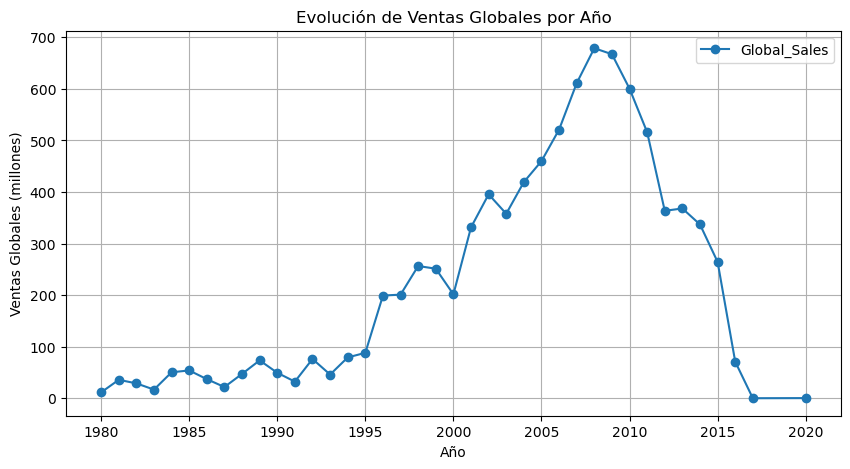

In [34]:
# Evolucion de Ventas Globales por Año
ventas_anuales = (
    df.groupby('Year')['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)   
ventas_anuales.plot(x='Year', y='Global_Sales', kind='line', marker='o', figsize=(10,5))
plt.title('Evolución de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid()
plt.show()

In [35]:
ventas_anuales = (
    df.groupby('Year')['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)

display(ventas_anuales)


,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


In [43]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
ventas_por_anio = (
    df
    .groupby('Year')['Global_Sales']
    .sum()
    .sort_index()
)

mejor_anio = ventas_por_anio.idxmax()
peor_anio = ventas_por_anio.idxmin()

print(f"Mejor año: {mejor_anio} con {ventas_por_anio.loc[mejor_anio]:.2f} millones")
print(f"Peor año: {peor_anio} con {ventas_por_anio.loc[peor_anio]:.2f} millones")



Mejor año: 2008.0 con 678.90 millones
Peor año: 2017.0 con 0.05 millones


In [46]:
# juego del mejor año
df[df['Year'] == mejor_anio].sort_values('Global_Sales', ascending=False).head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37
118,119,Gears of War 2,X360,2008.0,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76
144,145,Metal Gear Solid 4: Guns of the Patriots,PS3,2008.0,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03
148,149,LittleBigPlanet,PS3,2008.0,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50


In [47]:
# juego del peor año
df[df['Year'] == peor_anio].sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


In [50]:
# peor juego del mejor año
df[df['Year'] == mejor_anio].sort_values('Global_Sales', ascending=True).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.00,0.00,0.0,0.01
16130,16133,Dr. Slump & Arale-Chan,DS,2008.0,Adventure,Namco Bandai Games,0.0,0.00,0.01,0.0,0.01
16134,16137,Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore,DS,2008.0,Misc,Benesse,0.0,0.00,0.01,0.0,0.01
16147,16150,Chokkan! Asonde Relaxuma,DS,2008.0,Action,Rocket Company,0.0,0.00,0.01,0.0,0.01
16156,16159,PC Engine Best Collention: Ginga Ojousama Dens...,PSP,2008.0,Adventure,Hudson Soft,0.0,0.00,0.01,0.0,0.01
16164,16167,Rosario to Vampire: Tanabata no Miss Youkai Ga...,DS,2008.0,Adventure,Capcom,0.0,0.00,0.01,0.0,0.01
16176,16179,San-X Character Channel: All-Star Daishuugou!,DS,2008.0,Action,MTO,0.0,0.00,0.01,0.0,0.01
16113,16116,Winning Post 7 Maximum 2008,PS3,2008.0,Sports,Tecmo Koei,0.0,0.00,0.01,0.0,0.01
16206,16209,Who Wants to be a Millionaire: 2nd Edition,DS,2008.0,Misc,Ubisoft,0.0,0.01,0.00,0.0,0.01
16218,16221,Family Jockey,Wii,2008.0,Sports,Namco Bandai Games,0.0,0.00,0.01,0.0,0.01


In [52]:
# mejor juego del peor año
df[df['Year'] == peor_anio].sort_values('Global_Sales', ascending=True).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03


In [54]:
peor_anio = df.groupby('Year')['Global_Sales'].sum().idxmin()

mejor_juego_peor_anio = (
    df[df['Year'] == peor_anio]
    .loc[df[df['Year'] == peor_anio]['Global_Sales'].idxmax()]
)
print("Mejor juego del peor año:")
display(mejor_juego_peor_anio)  


Mejor juego del peor año:


Rank                                                       14393
Name            Phantasy Star Online 2 Episode 4: Deluxe Package
Platform                                                     PS4
Year                                                      2017.0
Genre                                               Role-Playing
Publisher                                                   Sega
NA_Sales                                                     0.0
EU_Sales                                                     0.0
JP_Sales                                                    0.03
Other_Sales                                                  0.0
Global_Sales                                                0.03
Name: 14390, dtype: object